In [34]:
import requests
from google.colab import userdata
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools
import warnings

warnings.filterwarnings('ignore')

In [35]:
def obter_fechamento_petroleo_brent(offset: int = 0) -> pd.DataFrame:
  api_key = userdata.get('eia-api-key')
  per_request = 5000
  url = f'https://api.eia.gov/v2/petroleum/pri/spt/data/?frequency=daily&data[0]=value&facets[series][]=RBRTE&sort[0][column]=period&sort[0][direction]=desc&offset={offset}&length={per_request}&api_key={api_key}'

  response = requests.get(url)
  df = pd.DataFrame()

  if response.status_code == 200:
      data = response.json()
      df = pd.DataFrame(data['response']['data'])
  else:
      print("Falha na requisição:", response.status_code)

  return df

In [36]:
df1 = obter_fechamento_petroleo_brent()
df2 = obter_fechamento_petroleo_brent(5000)
df_concat = pd.concat([df1, df2], ignore_index=True)

In [37]:
df_concat.shape

(9370, 11)

In [38]:
df_concat.head()

,period,duoarea,area-name,product,product-name,process,process-name,series,series-description,value,units
0,2024-04-02,ZEU,NA,EPCBRENT,UK Brent Crude Oil,PF4,Spot Price FOB,RBRTE,Europe Brent Spot Price FOB (Dollars per Barrel),87.63,$/BBL
1,2024-03-28,ZEU,NA,EPCBRENT,UK Brent Crude Oil,PF4,Spot Price FOB,RBRTE,Europe Brent Spot Price FOB (Dollars per Barrel),86.17,$/BBL
2,2024-03-27,ZEU,NA,EPCBRENT,UK Brent Crude Oil,PF4,Spot Price FOB,RBRTE,Europe Brent Spot Price FOB (Dollars per Barrel),84.94,$/BBL
3,2024-03-26,ZEU,NA,EPCBRENT,UK Brent Crude Oil,PF4,Spot Price FOB,RBRTE,Europe Brent Spot Price FOB (Dollars per Barrel),85.91,$/BBL
4,2024-03-25,ZEU,NA,EPCBRENT,UK Brent Crude Oil,PF4,Spot Price FOB,RBRTE,Europe Brent Spot Price FOB (Dollars per Barrel),86.18,$/BBL


In [39]:
df_concat.tail()

,period,duoarea,area-name,product,product-name,process,process-name,series,series-description,value,units
9365,1987-05-26,ZEU,NA,EPCBRENT,UK Brent Crude Oil,PF4,Spot Price FOB,RBRTE,Europe Brent Spot Price FOB (Dollars per Barrel),18.63,$/BBL
9366,1987-05-25,ZEU,NA,EPCBRENT,UK Brent Crude Oil,PF4,Spot Price FOB,RBRTE,Europe Brent Spot Price FOB (Dollars per Barrel),18.6,$/BBL
9367,1987-05-22,ZEU,NA,EPCBRENT,UK Brent Crude Oil,PF4,Spot Price FOB,RBRTE,Europe Brent Spot Price FOB (Dollars per Barrel),18.55,$/BBL
9368,1987-05-21,ZEU,NA,EPCBRENT,UK Brent Crude Oil,PF4,Spot Price FOB,RBRTE,Europe Brent Spot Price FOB (Dollars per Barrel),18.45,$/BBL
9369,1987-05-20,ZEU,NA,EPCBRENT,UK Brent Crude Oil,PF4,Spot Price FOB,RBRTE,Europe Brent Spot Price FOB (Dollars per Barrel),18.63,$/BBL


In [40]:
# verificando se a concatenação funcionou no limite da paginação (5000 registros)
df_concat.iloc[4995:5005, :]

,period,duoarea,area-name,product,product-name,process,process-name,series,series-description,value,units
4995,2004-08-02,ZEU,NA,EPCBRENT,UK Brent Crude Oil,PF4,Spot Price FOB,RBRTE,Europe Brent Spot Price FOB (Dollars per Barrel),41.35,$/BBL
4996,2004-07-30,ZEU,NA,EPCBRENT,UK Brent Crude Oil,PF4,Spot Price FOB,RBRTE,Europe Brent Spot Price FOB (Dollars per Barrel),41.47,$/BBL
4997,2004-07-29,ZEU,NA,EPCBRENT,UK Brent Crude Oil,PF4,Spot Price FOB,RBRTE,Europe Brent Spot Price FOB (Dollars per Barrel),40.93,$/BBL
4998,2004-07-28,ZEU,NA,EPCBRENT,UK Brent Crude Oil,PF4,Spot Price FOB,RBRTE,Europe Brent Spot Price FOB (Dollars per Barrel),41.08,$/BBL
4999,2004-07-27,ZEU,NA,EPCBRENT,UK Brent Crude Oil,PF4,Spot Price FOB,RBRTE,Europe Brent Spot Price FOB (Dollars per Barrel),40.09,$/BBL
5000,2004-07-26,ZEU,NA,EPCBRENT,UK Brent Crude Oil,PF4,Spot Price FOB,RBRTE,Europe Brent Spot Price FOB (Dollars per Barrel),39.75,$/BBL
5001,2004-07-23,ZEU,NA,EPCBRENT,UK Brent Crude Oil,PF4,Spot Price FOB,RBRTE,Europe Brent Spot Price FOB (Dollars per Barrel),39.59,$/BBL
5002,2004-07-22,ZEU,NA,EPCBRENT,UK Brent Crude Oil,PF4,Spot Price FOB,RBRTE,Europe Brent Spot Price FOB (Dollars per Barrel),39.16,$/BBL
5003,2004-07-21,ZEU,NA,EPCBRENT,UK Brent Crude Oil,PF4,Spot Price FOB,RBRTE,Europe Brent Spot Price FOB (Dollars per Barrel),38.48,$/BBL
5004,2004-07-20,ZEU,NA,EPCBRENT,UK Brent Crude Oil,PF4,Spot Price FOB,RBRTE,Europe Brent Spot Price FOB (Dollars per Barrel),38.96,$/BBL


In [41]:
df_concat.to_csv('preco-petroleo-brent-eia.csv', index=False)

In [42]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9370 entries, 0 to 9369
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   period              9370 non-null   object
 1   duoarea             9370 non-null   object
 2   area-name           9370 non-null   object
 3   product             9370 non-null   object
 4   product-name        9370 non-null   object
 5   process             9370 non-null   object
 6   process-name        9370 non-null   object
 7   series              9370 non-null   object
 8   series-description  9370 non-null   object
 9   value               9370 non-null   object
 10  units               9370 non-null   object
dtypes: object(11)
memory usage: 805.4+ KB


### Transformando o dataframe original para um dataframe que suporte algoritmos de timeseries

In [43]:
df = pd.read_csv('preco-petroleo-brent-eia.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9370 entries, 0 to 9369
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   period              9370 non-null   object 
 1   duoarea             9370 non-null   object 
 2   area-name           0 non-null      float64
 3   product             9370 non-null   object 
 4   product-name        9370 non-null   object 
 5   process             9370 non-null   object 
 6   process-name        9370 non-null   object 
 7   series              9370 non-null   object 
 8   series-description  9370 non-null   object 
 9   value               9370 non-null   float64
 10  units               9370 non-null   object 
dtypes: float64(2), object(9)
memory usage: 805.4+ KB


In [44]:
df.period = pd.to_datetime(df.period)
df.head()

,period,duoarea,area-name,product,product-name,process,process-name,series,series-description,value,units
0,2024-04-02,ZEU,NaN,EPCBRENT,UK Brent Crude Oil,PF4,Spot Price FOB,RBRTE,Europe Brent Spot Price FOB (Dollars per Barrel),87.63,$/BBL
1,2024-03-28,ZEU,NaN,EPCBRENT,UK Brent Crude Oil,PF4,Spot Price FOB,RBRTE,Europe Brent Spot Price FOB (Dollars per Barrel),86.17,$/BBL
2,2024-03-27,ZEU,NaN,EPCBRENT,UK Brent Crude Oil,PF4,Spot Price FOB,RBRTE,Europe Brent Spot Price FOB (Dollars per Barrel),84.94,$/BBL
3,2024-03-26,ZEU,NaN,EPCBRENT,UK Brent Crude Oil,PF4,Spot Price FOB,RBRTE,Europe Brent Spot Price FOB (Dollars per Barrel),85.91,$/BBL
4,2024-03-25,ZEU,NaN,EPCBRENT,UK Brent Crude Oil,PF4,Spot Price FOB,RBRTE,Europe Brent Spot Price FOB (Dollars per Barrel),86.18,$/BBL


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9370 entries, 0 to 9369
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   period              9370 non-null   datetime64[ns]
 1   duoarea             9370 non-null   object        
 2   area-name           0 non-null      float64       
 3   product             9370 non-null   object        
 4   product-name        9370 non-null   object        
 5   process             9370 non-null   object        
 6   process-name        9370 non-null   object        
 7   series              9370 non-null   object        
 8   series-description  9370 non-null   object        
 9   value               9370 non-null   float64       
 10  units               9370 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(8)
memory usage: 805.4+ KB


In [46]:
df_oil = df[['period', 'value']]
df_oil.columns = ['ds', 'y']
df_oil.head()

,ds,y
0,2024-04-02,87.63
1,2024-03-28,86.17
2,2024-03-27,84.94
3,2024-03-26,85.91
4,2024-03-25,86.18


In [47]:
df_oil.to_csv('timeseries-petroleo-brent.csv', index=False)

In [48]:
df_oil = pd.read_csv('timeseries-petroleo-brent.csv')
df_oil.ds = pd.to_datetime(df_oil.ds)
df_oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9370 entries, 0 to 9369
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      9370 non-null   datetime64[ns]
 1   y       9370 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 146.5 KB


<Axes: xlabel='y', ylabel='Count'>

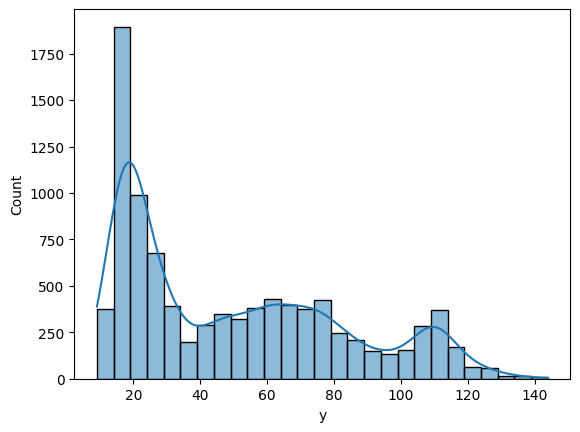

In [77]:
sns.histplot(data=df_oil.y, kde=True)

<Axes: ylabel='y'>

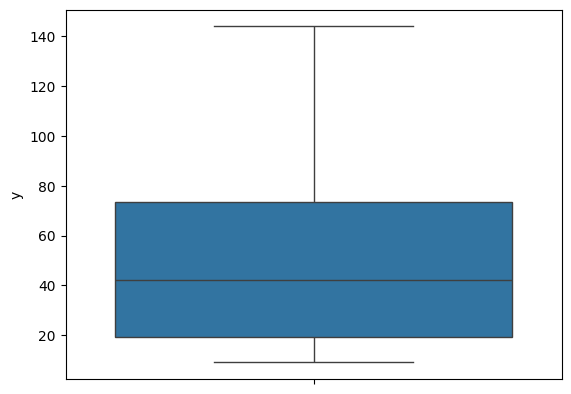

In [76]:
sns.boxplot(data=df_oil.y)

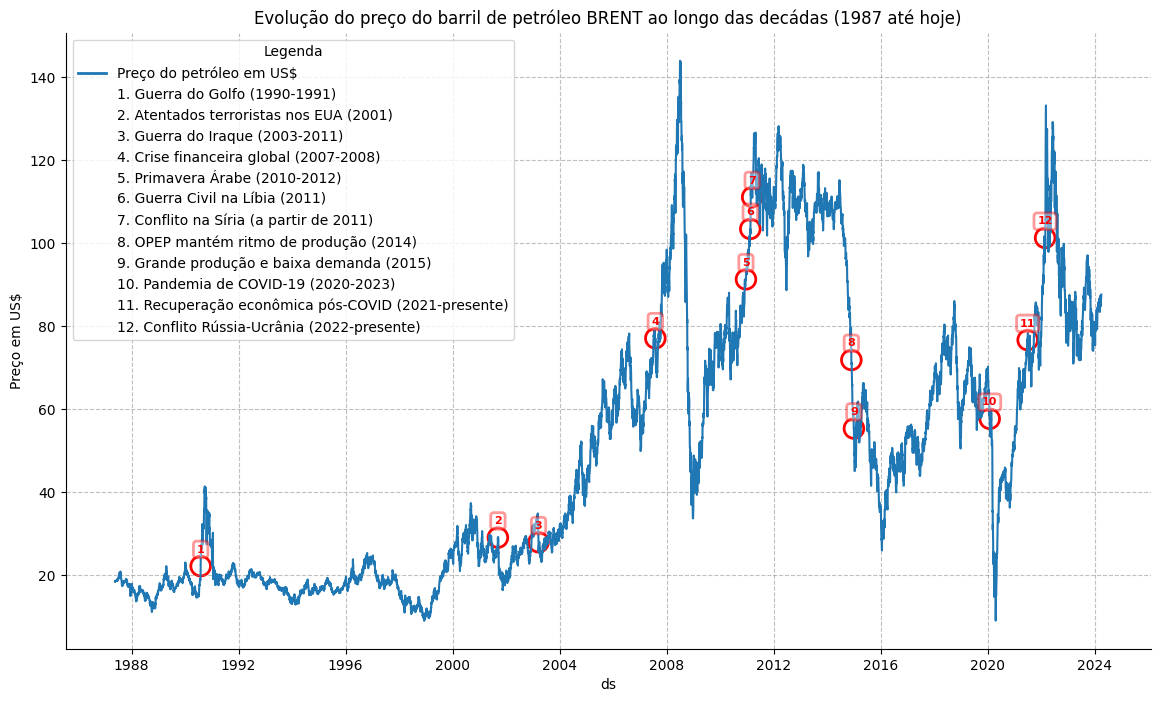

In [235]:
def plot_momentos_chaves_preco_petroleo(ponto: pd.Series, id_evento: int):
  if not ponto.empty:
    plt.scatter(ponto.ds, float(ponto.y), s=200, facecolors='none', edgecolors='red', linewidths=2)
    plt.text(ponto.ds, float(ponto.y) + 4, id_evento, ha='center', va='center', fontsize=8, fontweight='bold', color='red', bbox=dict(facecolor='white', alpha=0.4, edgecolor='red', boxstyle='round', lw=2))

def set_legenda():
  legend_handles, _ = plt.gca().get_legend_handles_labels()
  extra_labels = [
      ('Preço do petróleo em US$', '#1F77B4', 'line'),
      ('1. Guerra do Golfo (1990-1991)', 'red', 'dot'),
      ('2. Atentados terroristas nos EUA (2001)', 'red', 'dot'),
      ('3. Guerra do Iraque (2003-2011)', 'red', 'dot'),
      ('4. Crise financeira global (2007-2008)', 'red', 'dot'),
      ('5. Primavera Árabe (2010-2012)', 'red', 'dot'),
      ('6. Guerra Civil na Líbia (2011)', 'red', 'dot'),
      ('7. Conflito na Síria (a partir de 2011)', 'red', 'dot'),
      ('8. OPEP mantém ritmo de produção (2014)', 'red', 'dot'),
      ('9. Grande produção e baixa demanda (2015)', 'red', 'dot'),
      ('10. Pandemia de COVID-19 (2020-2023)', 'red', 'dot'),
      ('11. Recuperação econômica pós-COVID (2021-presente)', 'red', 'dot'),
      ('12. Conflito Rússia-Ucrânia (2022-presente)', 'red', 'dot')
  ]

  for label, cor, tipo in extra_labels:
      if tipo == 'line':
        legend_handles.append(plt.Line2D([0], [0], color=cor, lw=2, label=label))
      elif tipo == 'dot':
        legend_handles.append(plt.Line2D([0], [0], marker=None, color='None', label=label))

  plt.legend(title='Legenda', loc='upper left', handles=legend_handles)

plt.figure(figsize=(14, 8))
ax = sns.lineplot(data=df_oil, x='ds', y='y', legend=False)
ax.set_ylabel('Preço em US$')

plot_momentos_chaves_preco_petroleo(df_oil.query('ds == "1990-08-02"'), 1)
plot_momentos_chaves_preco_petroleo(df_oil.query('ds == "2001-09-11"'), 2)
plot_momentos_chaves_preco_petroleo(df_oil.query('ds == "2003-03-20"'), 3)
plot_momentos_chaves_preco_petroleo(df_oil.query('ds == "2007-08-01"'), 4)
# dia aproximado, já que em 18/12/2010, o mercado não operou (foi um sábado)
plot_momentos_chaves_preco_petroleo(df_oil.query('ds == "2010-12-20"'), 5)
plot_momentos_chaves_preco_petroleo(df_oil.query('ds == "2011-02-17"'), 6)
plot_momentos_chaves_preco_petroleo(df_oil.query('ds == "2011-03-15"'), 7)
plot_momentos_chaves_preco_petroleo(df_oil.query('ds == "2014-11-28"'), 8)
# não consegui encontrar uma data específica para o fato (utilizado o primeiro dia útil onde houve negociação)
plot_momentos_chaves_preco_petroleo(df_oil.query('ds == "2015-01-02"'), 9)
plot_momentos_chaves_preco_petroleo(df_oil.query('ds == "2020-01-30"'), 10)
# aqui estipulei o meio do ano como o início da recuperação, não encontrei uma data exata e no início do ano ainda estavamos sofrendo a onda mais forte da COVID-19
plot_momentos_chaves_preco_petroleo(df_oil.query('ds == "2021-07-01"'), 11)
plot_momentos_chaves_preco_petroleo(df_oil.query('ds == "2022-02-24"'), 12)

plt.grid(linestyle='--', color='gray', alpha=0.5)
sns.despine()
set_legenda()
plt.title('Evolução do preço do barril de petróleo BRENT ao longo das decádas (1987 até hoje)')
plt.show()

Dos últimos 34 anos, houveram pelo menos 12 momentos chave que influenciaram o preço do barril de petróleo, conforme a seguir:
1. Guerra do Golfo (1990-1991)
2. Atentados terroristas nos EUA (2001)
3. Guerra do Iraque (2003-2011)
4. Crise financeira global (2007-2008)
5. Primavera Árabe (2010-2012)
6. Guerra Civil na Líbia (2011)
7. Conflito na Síria (a partir de 2011)
8. Decisão dos membros da OPEP em manter o ritmo de produção (2014)
9. Grande aumento de produção pelos EUA e baixa demanda pela Europa e Ásia (2015)
10. Pandemia de COVID-19 (2020-2023)
11. Recuperação econômica pós-COVID (2021-presente)
12. Conflito Rússia-Ucrânia (2022-presente)

# Prophet
Vamos utilizar a biblioteca Prophet para realizar as previsões do preço do barril de petróleo. Para otimizar o modelo, serão utilizados dados a partir de 01/01/2020. Vale notar que o período escolhido engloba o início e fim da pandemia de COVID-19 (queda acentuada de preço) e o início da guerra entre a Rússia e a Ucrânia (aumento acentuado de preço).

In [50]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
from prophet.diagnostics import cross_validation, performance_metrics

In [51]:
df_oil.head()

,ds,y
0,2024-04-02,87.63
1,2024-03-28,86.17
2,2024-03-27,84.94
3,2024-03-26,85.91
4,2024-03-25,86.18


In [52]:
# apenas pega registros a partir de 2020 (não faz sentido utilizar todo o histórico de preços para prever uma janela do futuro)
df_ml = df_oil.query('ds >= "2020-01-01"')

In [53]:
train_data = df_ml.sample(frac=0.8, random_state=777)
test_data = df_ml.drop(train_data.index)

In [54]:
# https://facebook.github.io/prophet/docs/diagnostics.html#hyperparameter-tuning
def obter_melhores_hiperparametros_prophet(train_data: pd.DataFrame):
  param_grid = {
      'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
      'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
  }

  # todas combinações de parâmetros configuradas
  all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
  rmses = []

  # cross_validation para avaliar todos os parâmetros
  for params in all_params:
      m = Prophet(**params).fit(train_data)
      df_cv = cross_validation(m, horizon='30 days', parallel="processes")
      df_p = performance_metrics(df_cv, rolling_window=1)
      rmses.append(df_p['rmse'].values[0])

  # procurando os melhores hiperparâmetros
  tuning_results = pd.DataFrame(all_params)
  tuning_results['rmse'] = rmses
  print(tuning_results)

  # melhores parâmetros
  best_params = all_params[np.argmin(rmses)]
  print(best_params)

In [55]:
obter_melhores_hiperparametros_prophet(train_data)

A saída de streaming foi truncada nas últimas 5000 linhas.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxwue41z1/apccyq8i.json
01:02:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxwue41z1/2qkxkfyo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8538', 'data', 'file=/tmp/tmpxwue41z1/apccyq8i.json', 'init=/tmp/tmpxwue41z1/2qkxkfyo.json', 'output', 'file=/tmp/tmpxwue41z1/prophet_modelprmdyksi/prophet_model-20240407010219.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:02:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxwue41z1/n5fcqdyj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxwue41z1/72lc_bjf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num

    changepoint_prior_scale  seasonality_prior_scale       rmse
0                     0.001                     0.01  19.606768
1                     0.001                     0.10  21.682529
2                     0.001                     1.00  21.658151
3                     0.001                    10.00  21.189735
4                     0.010                     0.01  15.386057
5                     0.010                     0.10  17.674290
6                     0.010                     1.00  17.756926
7                     0.010                    10.00  17.726472
8                     0.100                     0.01  10.012673
9                     0.100                     0.10  10.800169
10                    0.100                     1.00  10.847474
11                    0.100                    10.00  10.859070
12                    0.500                     0.01   8.348030
13                    0.500                     0.10   9.925614
14                    0.500             

In [56]:
# cria o modelo do prophet com os melhores hiperparâmetros
modelo = Prophet(seasonality_mode='additive', daily_seasonality=False, weekly_seasonality=True, yearly_seasonality=True, changepoint_prior_scale=0.5, seasonality_prior_scale=0.01)
modelo.add_country_holidays(country_name='BR')
modelo.fit(train_data)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpxwue41z1/d5q5z4ql.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxwue41z1/yxn2drek.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66860', 'data', 'file=/tmp/tmpxwue41z1/d5q5z4ql.json', 'init=/tmp/tmpxwue41z1/yxn2drek.json', 'output', 'file=/tmp/tmpxwue41z1/prophet_modelx7d8jlhv/prophet_model-20240407010842.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:08:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:08:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [57]:
# faz a previsão dos próximos 30 dias para o preço do barril de petróleo do tipo BRENT
df_futuro = modelo.make_future_dataframe(periods=30, freq='D')
previsao = modelo.predict(df_futuro)
previsao.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Confraternização Universal,Confraternização Universal_lower,Confraternização Universal_upper,Dia do Trabalhador,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-01,76.446652,63.131599,72.411884,76.446652,76.446652,-2.298008,-2.298008,-2.298008,0.0,...,0.016038,0.016038,0.016038,-6.399685,-6.399685,-6.399685,0.0,0.0,0.0,67.764997
1,2020-01-02,75.984029,64.849242,74.694598,75.984029,75.984029,0.000000,0.000000,0.000000,0.0,...,-0.155569,-0.155569,-0.155569,-6.326379,-6.326379,-6.326379,0.0,0.0,0.0,69.502080
2,2020-01-03,75.521405,64.519368,74.359181,75.521405,75.521405,0.000000,0.000000,0.000000,0.0,...,0.108838,0.108838,0.108838,-6.243843,-6.243843,-6.243843,0.0,0.0,0.0,69.386401
3,2020-01-06,74.133535,63.119293,72.681030,74.133535,74.133535,0.000000,0.000000,0.000000,0.0,...,-0.174149,-0.174149,-0.174149,-5.933098,-5.933098,-5.933098,0.0,0.0,0.0,68.026289
4,2020-01-07,73.670912,63.367494,73.030680,73.670912,73.670912,0.000000,0.000000,0.000000,0.0,...,0.195802,0.195802,0.195802,-5.807380,-5.807380,-5.807380,0.0,0.0,0.0,68.059334


In [58]:
# plot dos preços históricos (desde 2020) + janela de previsão
plot_plotly(modelo, previsao, trend=True, figsize=(1200, 900))

In [59]:
plot_components_plotly(modelo, previsao)

In [60]:
def calcular_mape_previsao(previsao: pd.DataFrame, train_data: pd.DataFrame):
  # extrai as colunas relevantes dos dataframes
  previsao_cols = ['ds', 'yhat']
  valores_reais_cols = ['ds', 'y']

  previsao = previsao[previsao_cols]
  valores_reais = train_data[valores_reais_cols]

  # merge os dataframes nas colunas 'ds' para comparar previsões e valores reais
  resultados = pd.merge(previsao, valores_reais, on='ds', how='inner')

  # calcula o erro percentual absoluto para cada ponto de dados
  resultados['erro_percentual_absoluto'] = np.abs((resultados['y'] - resultados['yhat']) / resultados['y']) * 100

  # cálculo do MAPE
  mape = np.mean(resultados['erro_percentual_absoluto'])
  mape_decimal = np.round(mape / 100, 2)

  print(f'MAPE decimal: {mape_decimal:.2f}')
  print(f"MAPE: {mape:.8f}%")

In [61]:
calcular_mape_previsao(previsao, train_data)

MAPE decimal: 0.04
MAPE: 4.08787678%


# Referências

1. https://pt.wikipedia.org/wiki/Guerra_do_Golfo
2. https://pt.wikipedia.org/wiki/Ataques_de_11_de_setembro_de_2001
3. https://pt.wikipedia.org/wiki/Guerra_do_Iraque
4. https://pt.wikipedia.org/wiki/Crise_financeira_de_2007%E2%80%932008
5. https://pt.wikipedia.org/wiki/Primavera_%C3%81rabe
6. https://pt.wikipedia.org/wiki/Guerra_Civil_L%C3%ADbia_(2011)
7. https://pt.wikipedia.org/wiki/Guerra_Civil_S%C3%ADria
8. https://economia.uol.com.br/noticias/afp/2014/11/27/opep-mantem-teto-de-producao-inalterado.htm
9. https://g1.globo.com/economia/noticia/2015/01/entenda-queda-do-preco-do-petroleo-e-seus-efeitos.html#:~:text=Os%20principais%20apontados%20como%20%22culpados,na%20Europa%20e%20na%20%C3%81sia
10. https://pt.wikipedia.org/wiki/Pandemia_de_COVID-19
11. https://agenciabrasil.ebc.com.br/economia/noticia/2022-06/economia-segue-em-recuperacao-com-crescimento-robusto-diz-secretaria
12. https://pt.wikipedia.org/wiki/Invas%C3%A3o_da_Ucr%C3%A2nia_pela_R%C3%BAssia_(2022%E2%80%93presente)